# Data Visualization Exercise: US Airline Flight Fares

In this excercise we're taking a dataset with different arline flights features, our objetive will be explore this dataset, produce some visualizations that add value to the analysis and then implement a prediction model that suit this case.

## References
The dataset was took from Kaggel portal, you can find the orginal post in the following link:
- https://www.kaggle.com/datasets/bhavikjikadara/us-airline-flight-routes-and-fares-1993-2024

\* please keep in mind dataset was taken from other post but the aproch and analysis is comming from myself.

### Dataset decription

#### Features:
- tbl: Table identifier
- Year: Year of the data record
- quarter: Quarter of the year (1-4)
- citymarketid_1: Origin city market ID
- citymarketid_2: Destination city market ID
- city1: Origin city name
- city2: Destination city name
- airportid_1: Origin airport ID
- airportid_2: Destination airport ID
- airport_1: Origin airport code
- airport_2: Destination airport code
- nsmiles: Distance between airports in miles
- passengers: Number of passengers
- fare: Average fare
- carrier_lg: Code for the largest carrier by passengers
- large_ms: Market share of the largest carrier
- fare_lg: Average fare of the largest carrier
- carrier_low: Code for the lowest fare carrier
- lf_ms: Market share of the lowest fare carrier
- fare_low: Lowest fare
- Geocoded_City1: Geocoded coordinates for the origin city
- Geocoded_City2: Geocoded coordinates for the destination city
- tbl1apk: Unique identifier for the route


In [1]:
import torch
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

device = "cuda" if torch.cuda.is_available() else "cpu"
print('Selected Device:', device)

Selected Device: cpu


In [2]:
Raw_DataSet = pd.read_csv('./US Airline Flight Routes and Fares 1993-2024.csv',low_memory=False)

In [3]:
Raw_DataSet.dtypes

tbl                object
Year                int64
quarter             int64
citymarketid_1      int64
citymarketid_2      int64
city1              object
city2              object
airportid_1         int64
airportid_2         int64
airport_1          object
airport_2          object
nsmiles             int64
passengers          int64
fare              float64
carrier_lg         object
large_ms          float64
fare_lg           float64
carrier_low        object
lf_ms             float64
fare_low          float64
Geocoded_City1     object
Geocoded_City2     object
tbl1apk            object
dtype: object

In [4]:
numeric_columns = ["nsmiles", "passengers", "fare", "large_ms", "fare_lg", "lf_ms", "fare_low"]
Raw_DataSet.loc[:,numeric_columns].describe().round(2)

,nsmiles,passengers,fare,large_ms,fare_lg,lf_ms,fare_low
count,245955.00,245955.00,245955.00,244415.00,244415.00,244343.00,244343.00
mean,1189.81,299.48,218.98,0.67,218.71,0.45,190.68
std,703.14,511.39,82.37,0.22,84.67,0.33,73.58
min,109.00,0.00,50.00,0.00,50.00,0.01,50.00
25%,626.00,21.00,164.62,0.48,161.50,0.16,140.06
50%,1023.00,113.00,209.32,0.65,208.03,0.36,181.63
75%,1736.00,339.00,262.89,0.87,263.64,0.75,230.04
max,2724.00,8301.00,3377.00,1.00,2725.60,1.00,2725.60


In [6]:
total_rows = Raw_DataSet.shape[0]
print("Null Values\tPercentage\tColumn name\tdtype")
for col in Raw_DataSet.columns:
    null_count = pd.isnull(Raw_DataSet[col]).sum()
    percen_null_values = 100*null_count/total_rows
    print(null_count,'\t\t',str(percen_null_values.round(1))+'%','\t\t',col,'\t\t',Raw_DataSet[col].dtype)

Null Values	Percentage	Column name	dtype
0 		 0.0% 		 tbl 		 object
0 		 0.0% 		 Year 		 int64
0 		 0.0% 		 quarter 		 int64
0 		 0.0% 		 citymarketid_1 		 int64
0 		 0.0% 		 citymarketid_2 		 int64
0 		 0.0% 		 city1 		 object
0 		 0.0% 		 city2 		 object
0 		 0.0% 		 airportid_1 		 int64
0 		 0.0% 		 airportid_2 		 int64
0 		 0.0% 		 airport_1 		 object
0 		 0.0% 		 airport_2 		 object
0 		 0.0% 		 nsmiles 		 int64
0 		 0.0% 		 passengers 		 int64
0 		 0.0% 		 fare 		 float64
1540 		 0.6% 		 carrier_lg 		 object
1540 		 0.6% 		 large_ms 		 float64
1540 		 0.6% 		 fare_lg 		 float64
1612 		 0.7% 		 carrier_low 		 object
1612 		 0.7% 		 lf_ms 		 float64
1612 		 0.7% 		 fare_low 		 float64
39206 		 15.9% 		 Geocoded_City1 		 object
39206 		 15.9% 		 Geocoded_City2 		 object
0 		 0.0% 		 tbl1apk 		 object


## Inspecting Numeric Features

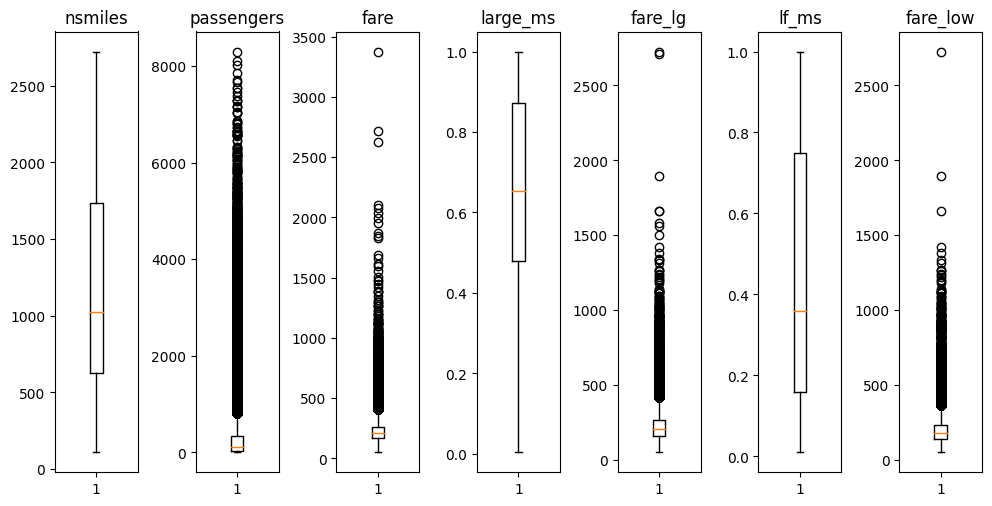

In [5]:
nplots = len(numeric_columns)

fig, axs = plt.subplots(1,nplots,figsize=(10, 5))
fig.tight_layout() 

for index, ax in enumerate(axs):
    ax.set_title(numeric_columns[index])
    ax.boxplot(Raw_DataSet.loc[:,[numeric_columns[index]]].dropna())

plt.show()

In [29]:
def scatter_plot(df, col_x, col_y, label_x, label_y, val_title, colorcode, fitline = 0, log = False):
    plt.figure(figsize=(7,7))
    ax = plt.gca()
    plt.scatter(x=df[col_x],y=df[col_y], c= df[colorcode],cmap='viridis')
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.title(val_title)
    plt.grid(color='gray', linestyle='dashed')
    plt.colorbar()
    if log:
        ax.set_yscale('log')
    if fitline > 0:
        z = np.polyfit(df[col_x], df[col_y], fitline)
        p = np.poly1d(z)
        plt.plot(df[col_x], p(df[col_x]), "r")
    plt.show()

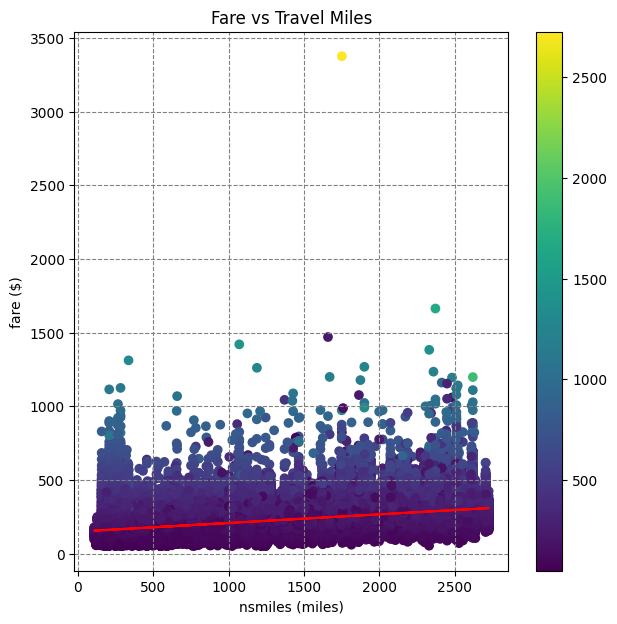

In [30]:
scatter_plot(Raw_DataSet, col_x = 'nsmiles', col_y = 'fare', label_x = 'nsmiles (miles)', label_y = 'fare ($)',
          val_title = 'Fare vs Travel Miles', colorcode = 'fare_low', fitline = 1)

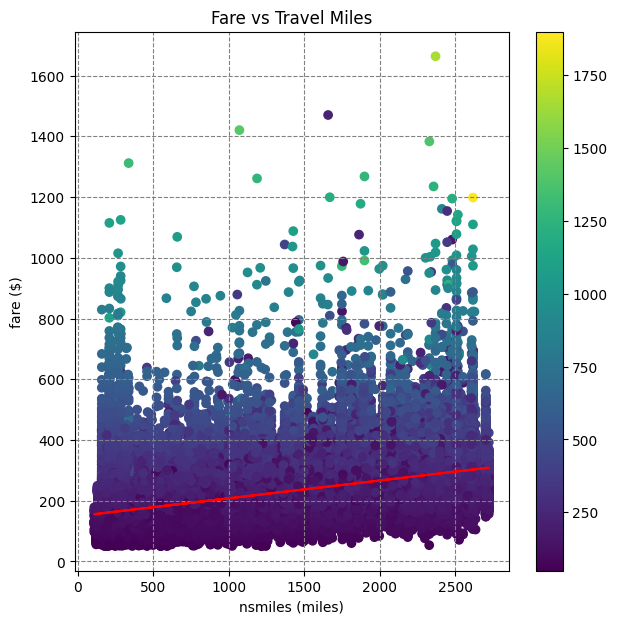

In [34]:
scatter_plot(Raw_DataSet[(Raw_DataSet['fare'] < 2000)], col_x = 'nsmiles', col_y = 'fare', label_x = 'nsmiles (miles)', label_y = 'fare ($)',
          val_title = 'Fare vs Travel Miles', colorcode = 'fare_low', fitline = 1)

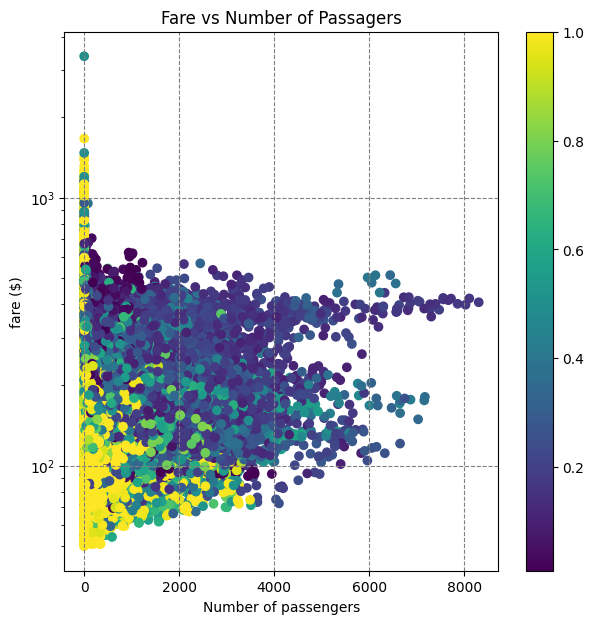

In [31]:
scatter_plot(Raw_DataSet, col_x = 'passengers', col_y = 'fare', label_x = 'Number of passengers', label_y = 'fare ($)',
          val_title = 'Fare vs Number of Passagers', log=True, colorcode = 'lf_ms')

[]

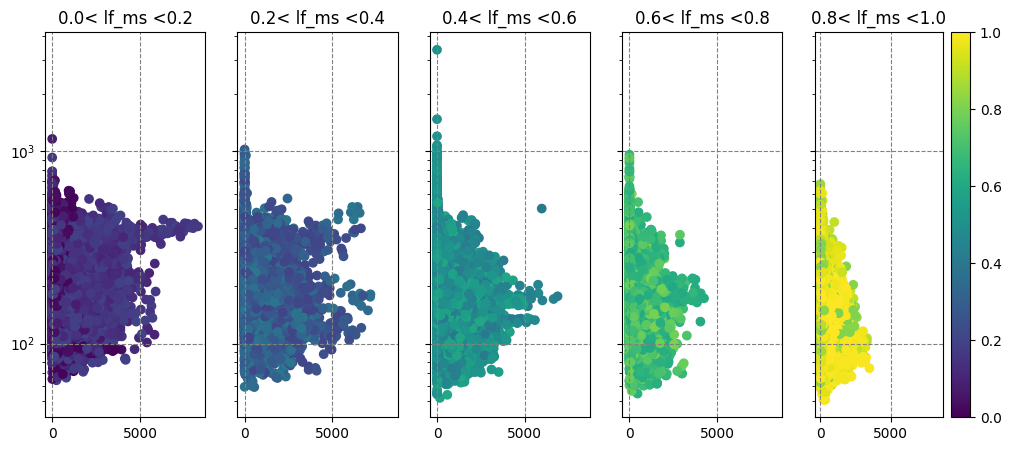

In [32]:
fig, axs = plt.subplots(1,5, sharex='all',sharey='all',figsize=(12, 5))
nplots = len(axs)
interval = 1/nplots
for i,axi in enumerate(axs):
    init_int = i*interval
    end_int = (i+1)*interval
    df = Raw_DataSet[(Raw_DataSet['lf_ms'] > init_int) & (Raw_DataSet['lf_ms'] < end_int)]
    pcm = axi.scatter(x=df['passengers'],y=df['fare'],c= df['lf_ms'],cmap='viridis',vmin=0, vmax=1)
    axi.set_title(str(round(init_int,2))+"< lf_ms <"+str(round(end_int,2)))
    axi.set_yscale('log')
    axi.grid(color='gray', linestyle='dashed')

fig.colorbar(pcm, location='right')
plt.plot()

[]

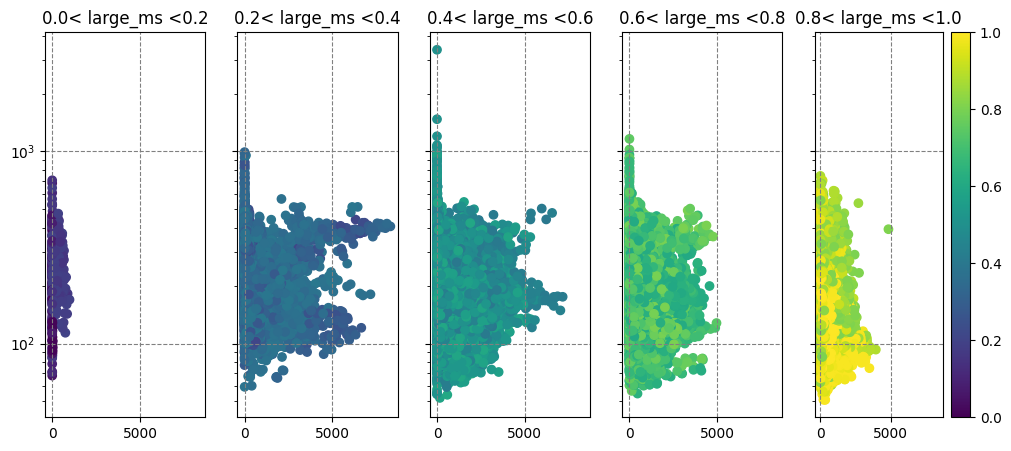

In [33]:
fig, axs = plt.subplots(1,5, sharex='all',sharey='all',figsize=(12, 5))
nplots = len(axs)
interval = 1/nplots
for i,axi in enumerate(axs):
    init_int = i*interval
    end_int = (i+1)*interval
    df = Raw_DataSet[(Raw_DataSet['large_ms'] > init_int) & (Raw_DataSet['large_ms'] < end_int)]
    pcm = axi.scatter(x=df['passengers'],y=df['fare'],c= df['large_ms'],cmap='viridis',vmin=0, vmax=1)
    axi.set_title(str(round(init_int,2))+"< large_ms <"+str(round(end_int,2)))
    axi.set_yscale('log')
    axi.grid(color='gray', linestyle='dashed')

fig.colorbar(pcm, location='right')
plt.plot()

## Inspecting Categoric Features

## Cleaning the dataset

In [12]:
# IQR
Q1 = np.percentile(Raw_DataSet['fare'], 25, method='midpoint')
Q3 = np.percentile(Raw_DataSet['fare'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)

98.26999999999998


In [13]:
# Above Upper limit
upper = Q3+1.5*IQR
upper_outliers = np.array(Raw_DataSet['fare'] >= upper).sum()
print("Upper limit:", upper)
print(upper_outliers,"-", f"{upper_outliers/Raw_DataSet.shape[0]:.0%}")

# Below Lower limit
lower = Q1-1.5*IQR
lower_outliers = np.array(Raw_DataSet['fare'] <= lower).sum()
print("Lower limit:", lower)
print(lower_outliers, "-", f"{lower_outliers/Raw_DataSet.shape[0]:.0%}")

Upper limit: 410.29499999999996
4757 - 2%
Lower limit: 17.215000000000032
0 - 0%


In [24]:
Dataset = Raw_DataSet[(Raw_DataSet['fare'] <= upper)] 
Dataset = Dataset[(Dataset['fare'] >= lower)] 

In [25]:
Dataset.loc[:,numeric_columns].describe().round(2)

,nsmiles,passengers,fare,large_ms,fare_lg,lf_ms,fare_low
count,241198.00,241198.00,241198.00,239943.00,239943.00,239878.00,239878.00
mean,1175.29,302.92,213.28,0.66,213.56,0.45,186.41
std,695.14,509.96,68.94,0.22,73.87,0.33,63.58
min,109.00,0.00,50.00,0.00,50.00,0.01,50.00
25%,625.00,23.00,163.66,0.48,160.55,0.16,139.23
50%,1005.00,117.00,207.56,0.65,206.32,0.36,180.21
75%,1671.00,345.00,259.09,0.87,259.92,0.75,227.00
max,2724.00,8301.00,410.29,1.00,901.00,1.00,901.00


In [27]:
total_rows = Dataset.shape[0]
print("Null Values\tPercentage\tColumn name")
for col in Dataset.columns:
    null_count = pd.isnull(Dataset[col]).sum()
    percen_null_values = 100*null_count/total_rows
    print(null_count,'\t\t',str(percen_null_values.round(1))+'%','\t\t',col)

Null Values	Percentage	Column name
0 		 0.0% 		 tbl
0 		 0.0% 		 Year
0 		 0.0% 		 quarter
0 		 0.0% 		 citymarketid_1
0 		 0.0% 		 citymarketid_2
0 		 0.0% 		 city1
0 		 0.0% 		 city2
0 		 0.0% 		 airportid_1
0 		 0.0% 		 airportid_2
0 		 0.0% 		 airport_1
0 		 0.0% 		 airport_2
0 		 0.0% 		 nsmiles
0 		 0.0% 		 passengers
0 		 0.0% 		 fare
1255 		 0.5% 		 carrier_lg
1255 		 0.5% 		 large_ms
1255 		 0.5% 		 fare_lg
1320 		 0.5% 		 carrier_low
1320 		 0.5% 		 lf_ms
1320 		 0.5% 		 fare_low
38298 		 15.9% 		 Geocoded_City1
38298 		 15.9% 		 Geocoded_City2
0 		 0.0% 		 tbl1apk
